# Plotting routine for the Sep22 Event - PSP

In [ ]:
test = 'test'

In [75]:
%load_ext autoreload

%autoreload 2

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pickle as p

import datetime as datetime
from datetime import timedelta
import seaborn as sns
import pandas as pd
from pandas.plotting import table
import os
#import copy as cp

import multiprocessing
import py3dcore_h4c as py3dcore_h4c

import py3dcore_h4c.fluxplot as fp

#plt.switch_backend('agg')


import warnings
warnings.filterwarnings('ignore')

import logging

logging.basicConfig(level=logging.INFO)
logging.getLogger("heliosat.spice").setLevel("WARNING")
logging.getLogger("heliosat.spacecraft").setLevel("WARNING")
#logging.getLogger("sunpy").setLevel("WARNING")
#logging.getLogger("py3dcore_h4c.fluxplot").setLevel("WARNING")

#print(sns.__version__)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### setting the times for py3DCORE_h4c

In [77]:
t_launch = datetime.datetime(2022, 9, 5, 16, tzinfo=datetime.timezone.utc) # 

t_s = datetime.datetime(2022, 9, 5, 18, tzinfo=datetime.timezone.utc) 
t_e = datetime.datetime(2022, 9, 6, 2, 30, tzinfo=datetime.timezone.utc)

t_fit = [
        datetime.datetime(2022, 9, 5, 19, 5, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 9, 5, 20, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 9, 6, 0, 5, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 9, 6, 2, tzinfo=datetime.timezone.utc)
     ]


#t_fit = fp.equal_t_creator(start = start, n = 4, delta = 6)

#####2022 Sep 5: 3 solar radii at 17 UT (COR2 & LASCO FoV appearance)
# 2022 Sep 5: 15 solar radii at 18:45 UT (PSP)

#### loading the pickle files

In [80]:
fittingPoints = []

fittingPoints = [t_fit[i].strftime("%m/%d/%Y, %H:%M:%S") for i in range(len(t_fit))]
print(fittingPoints)

['09/05/2022, 19:05:00', '09/05/2022, 20:00:00', '09/06/2022, 00:05:00', '09/06/2022, 02:00:00']


In [81]:
path = 'output/psp05092022_heeq_512_19_uniformExpansion/'

filepath = fp.loadpickle(path, number = -1)

In [82]:
filepath[:-7]

'output/psp05092022_heeq_512_19_uniformExpansion/08'


#### extracting parameters

In [83]:
res, allres, ind, meanparams = fp.get_params(filepath, give_mineps=True)

INFO:py3dcore_h4c.fluxplot:Retrieved the following parameters for the run with minimum epsilon:
INFO:py3dcore_h4c.fluxplot: --lon:  122.86
INFO:py3dcore_h4c.fluxplot: --lat:  -21.16
INFO:py3dcore_h4c.fluxplot: --inc:  123.74
INFO:py3dcore_h4c.fluxplot: --diameter 1 AU:  0.35
INFO:py3dcore_h4c.fluxplot: --aspect ratio:  3.59
INFO:py3dcore_h4c.fluxplot: --launch radius:  7.94
INFO:py3dcore_h4c.fluxplot: --launch speed:  956.93
INFO:py3dcore_h4c.fluxplot: --t factor:  -145.71
INFO:py3dcore_h4c.fluxplot: --expansion rate:  0.82
INFO:py3dcore_h4c.fluxplot: --magnetic field decay rate:  1.64
INFO:py3dcore_h4c.fluxplot: --magnetic field 1 AU:  6.95
INFO:py3dcore_h4c.fluxplot: --drag coefficient:  2.60
INFO:py3dcore_h4c.fluxplot: --sw background speed:  59.35


In [90]:
print(meanparams)

[ 0.0000000e+00  1.2768287e+02 -6.5090303e+00  1.1850366e+02
  3.2811069e-01  2.0632334e+00  7.5672035e+00  1.2630487e+03
 -1.7438358e+02  8.2699537e-01  1.6400100e+00  1.2272316e+01
  3.3478999e+00  7.9882050e+01]
[ 0.0000000e+00  1.2285937e+02 -2.1160053e+01  1.2373998e+02
  3.4630215e-01  3.5904469e+00  7.9421611e+00  9.5692633e+02
 -1.4570807e+02  8.1598902e-01  1.6400000e+00  6.9455132e+00
  2.6019061e+00  5.9354725e+01]


In [85]:
out = fp.get_ensemble_stats(filepath)

In [86]:
out.describe()

,lon,lat,inc,D1AU,delta,launch radius,launch speed,t factor,B1AU,gamma,vsw
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,127.682907,-6.509030,118.503700,0.328111,2.063233,7.567203,1263.048340,-174.383545,12.272314,3.347898,79.882050
std,7.331278,12.019567,10.928049,0.016892,0.759972,1.240076,351.419250,43.153164,3.047381,0.475580,22.664732
min,103.170959,-30.010204,87.529839,0.257581,1.002648,5.012370,700.454773,-249.276703,5.036207,1.692821,50.129158
25%,121.963091,-15.540588,111.462795,0.319395,1.392754,6.655276,959.621460,-208.684406,10.173351,3.082309,61.607164
50%,127.978729,-8.219212,118.732769,0.330996,1.968638,7.562296,1246.896667,-175.755341,11.978359,3.411048,75.337345
75%,132.815662,1.250633,125.681122,0.341056,2.587223,8.415857,1538.987213,-142.381512,14.075888,3.728760,94.256887
max,147.183289,28.924990,153.457077,0.349987,3.973434,11.092494,1996.248779,-52.341183,21.785559,3.999884,181.100677


In [96]:
names = ['lon: ', 'lat: ', 'inc: ', 'diameter 1 AU: ', 'aspect ratio: ', 'launch radius: ', 'launch speed: ', 
         't factor: ', 'expansion rate: ', 'magnetic field decay rate: ', 'magnetic field 1 AU: ', 'drag coefficient: ', 
         'background sw speed: ']
for count, name in enumerate(names):
    print(" --{} {:.2f}".format(name, res[count+1]))

 --lon:  122.86
 --lat:  -21.16
 --inc:  123.74
 --diameter 1 AU:  0.35
 --aspect ratio:  3.59
 --launch radius:  7.94
 --launch speed:  956.93
 --t factor:  -145.71
 --expansion rate:  0.82
 --magnetic field decay rate:  1.64
 --magnetic field 1 AU:  6.95
 --drag coefficient:  2.60
 --background sw speed:  59.35


In [95]:
# write output of describe() to csv-file
out.describe().to_csv(filepath+'parameters.csv')

# write parameters of whole ensemble to txt-file
with open(filepath+'parameters_ensemble.txt', 'a') as f:
    dfAsString = out.to_string(header=True, index=True)
    f.write(dfAsString)


INFO:py3dcore_h4c.fluxplot:Retrieved the following parameters for the run with minimum epsilon:
INFO:py3dcore_h4c.fluxplot: --lon:  122.86
INFO:py3dcore_h4c.fluxplot: --lat:  -21.16
INFO:py3dcore_h4c.fluxplot: --inc:  123.74
INFO:py3dcore_h4c.fluxplot: --diameter 1 AU:  0.35
INFO:py3dcore_h4c.fluxplot: --aspect ratio:  3.59
INFO:py3dcore_h4c.fluxplot: --launch radius:  7.94
INFO:py3dcore_h4c.fluxplot: --launch speed:  956.93
INFO:py3dcore_h4c.fluxplot: --t factor:  -145.71
INFO:py3dcore_h4c.fluxplot: --expansion rate:  0.82
INFO:py3dcore_h4c.fluxplot: --magnetic field decay rate:  1.64
INFO:py3dcore_h4c.fluxplot: --magnetic field 1 AU:  6.95
INFO:py3dcore_h4c.fluxplot: --drag coefficient:  2.60
INFO:py3dcore_h4c.fluxplot: --background sw speed:  59.35


In [99]:
names = ['lon: ', 'lat: ', 'inc: ', 'diameter 1 AU: ', 'aspect ratio: ', 'launch radius: ', 'launch speed: ', 
         't factor: ', 'expansion rate: ', 'magnetic field decay rate: ', 'magnetic field 1 AU: ', 'drag coefficient: ', 
         'background sw speed: ']
 
# write output of describe() to txt-file    
with open(filepath+'parameters_summary.txt', 'a') as f:
    dfAsString = out.describe().to_string(header=True, index=True)
    f.write(dfAsString)   
    f.write('\n')
    f.write('Fitting points:')
    f.write(str(fittingPoints))
    f.write('\n')
    f.write('Parameters for run with min(eps):')
    f.write('\n')
    for count, name in enumerate(names):
        f.write(" --{} {:.2f}".format(name, res[count+1]))
        f.write('\n')

#### loading and plotting the fitting results

INFO:py3dcore_h4c.fluxplot:No iparams_arr given, using parameters for run with minimum eps.
INFO:py3dcore_h4c.fluxplot:Plotting run with mean parameters.
INFO:py3dcore_h4c.fitter.base:Using custom datafile: psp_2022sep.p


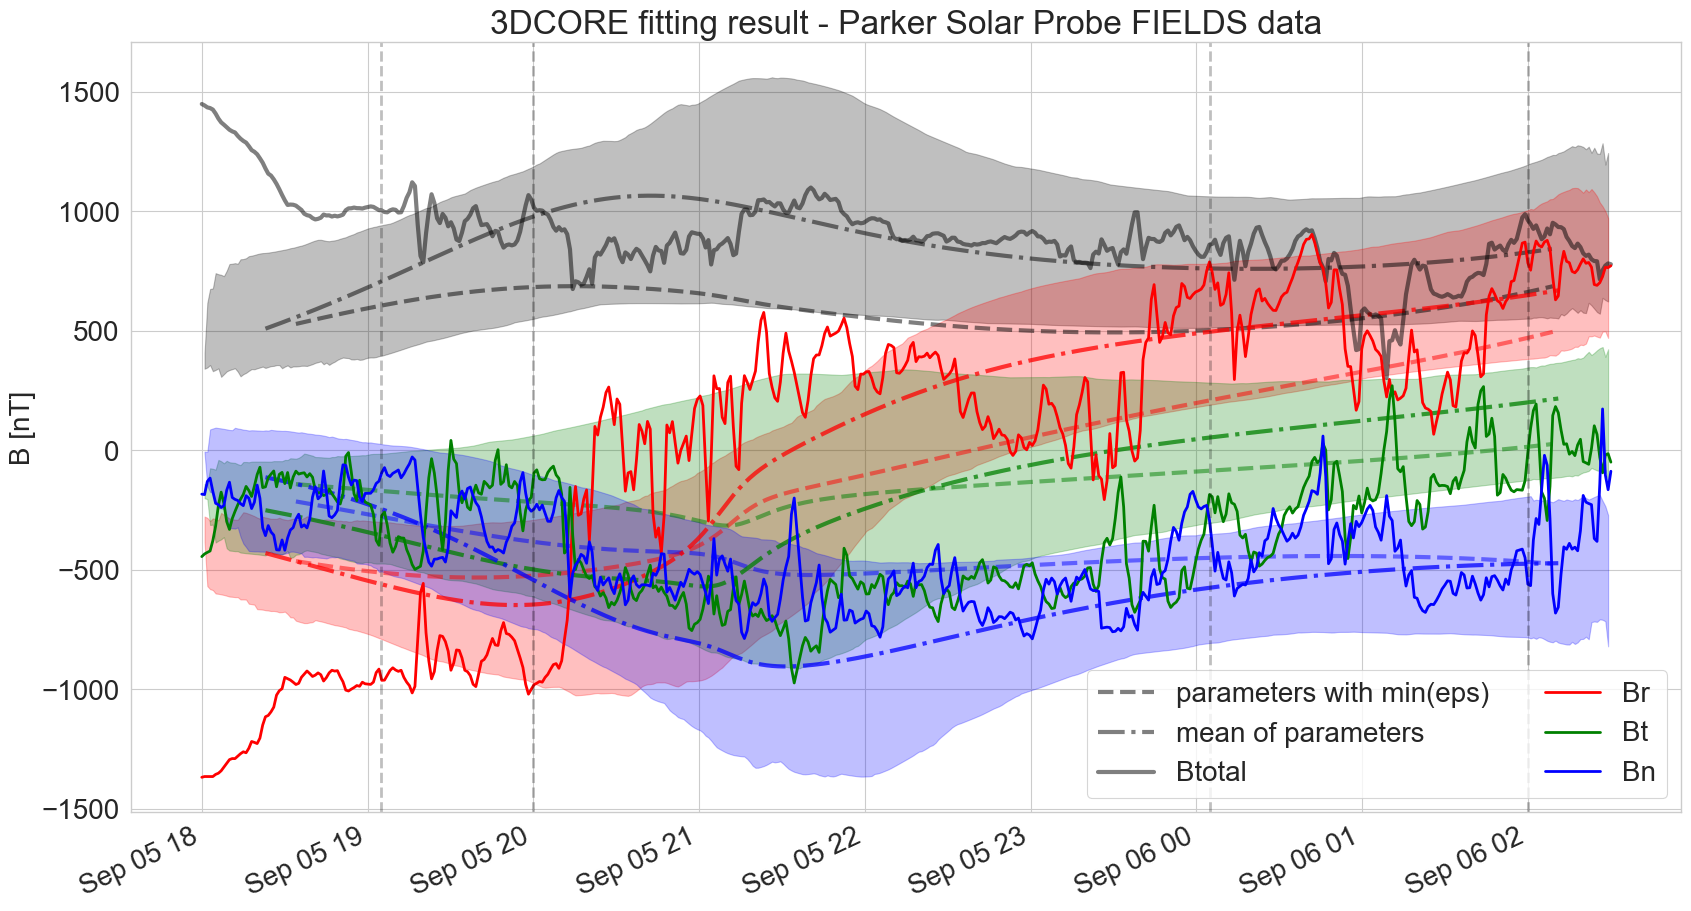

In [88]:
fp.fullinsitu(observer='PSP', t_fit=t_fit, start=t_s, end=t_e, filepath=filepath, max_index=512,
              custom_data='psp_2022sep.p', best=True, ensemble=True, mean=True, save_fig=True, legend=True, fixed=None)

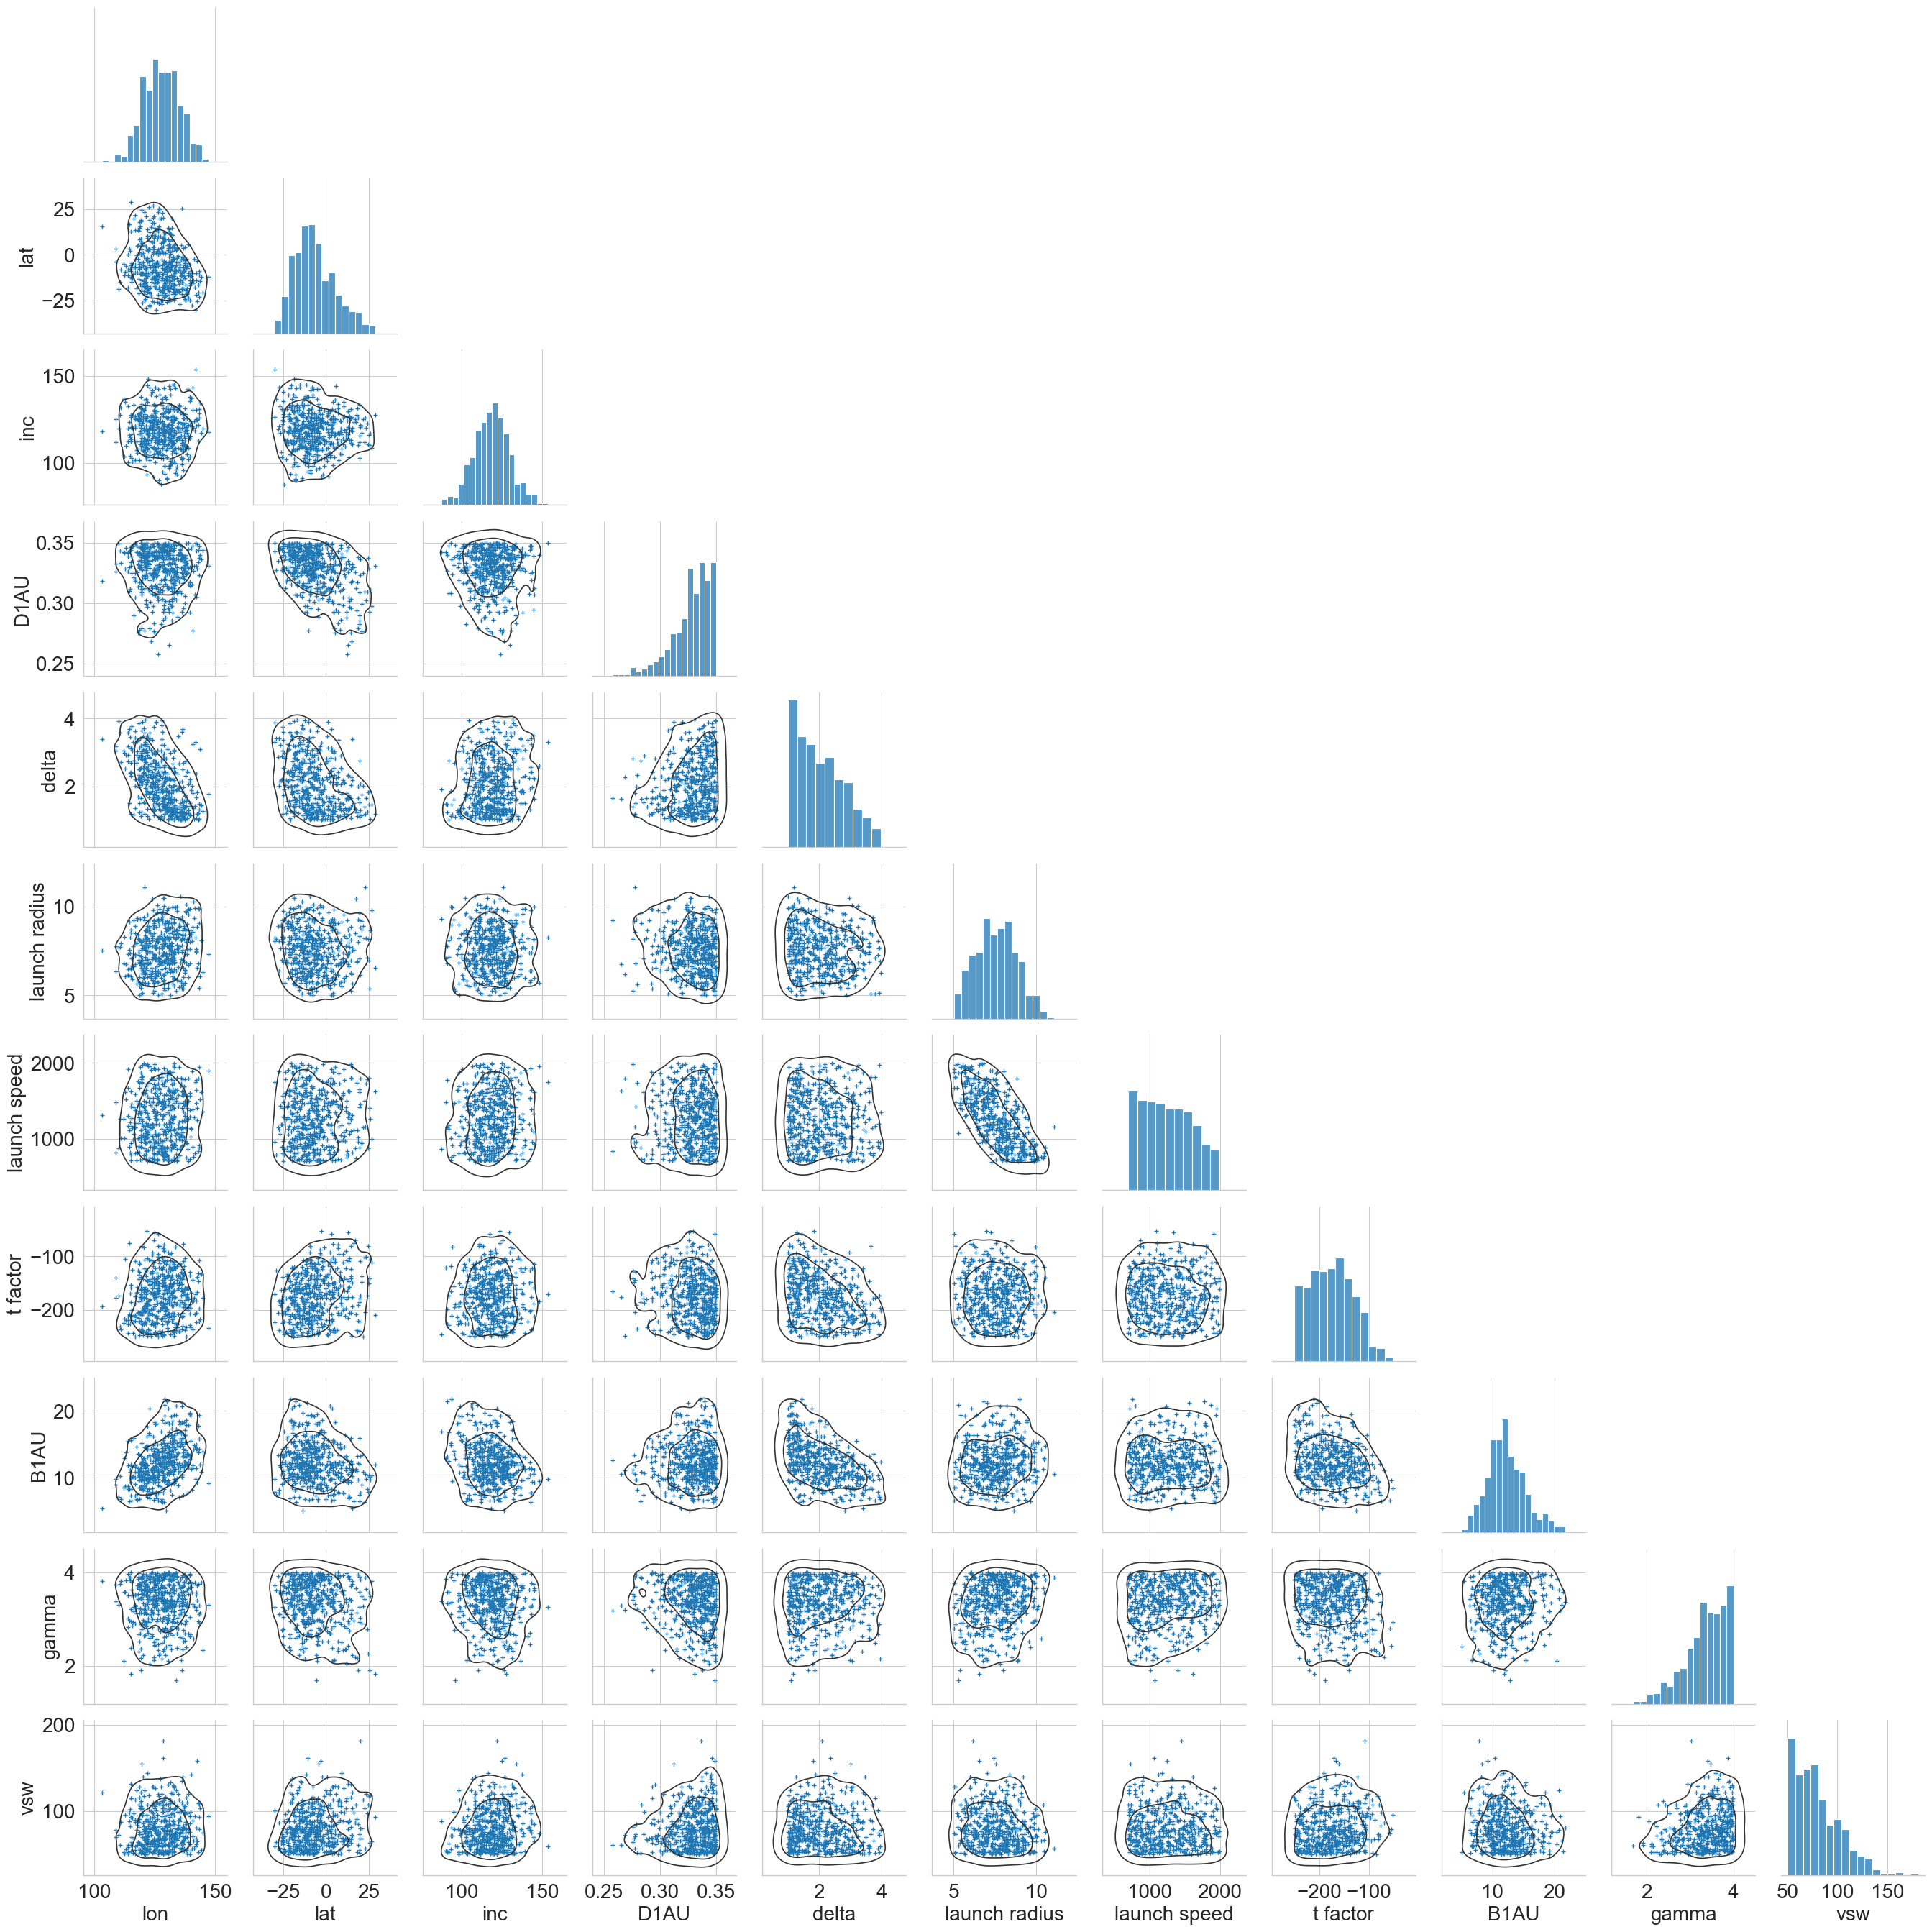

In [89]:
fp.scatterparams(filepath)

In [ ]:
print(out['lon'].mean())
print(out['lon'].std())
print(out['launch radius'].std())
print(out['launch speed'].std())

#### Plotting the fluxrope and spacecraft positions

In [ ]:
#measurement times 
#tm0 =  t_launch + datetime.timedelta(days=1.5)
tm0 =  datetime.datetime(2022, 9, 5, 16)
tm1 =  datetime.datetime(2022, 9, 5, 20, 30)
# tm1 = t_launch + datetime.timedelta(days=1.7)
tm2 =  t_launch + datetime.timedelta(days=3.5)

fig = fp.full3d(spacecraftlist=['psp'], t = tm1, filepath = filepath, custom_data='psp_sep2022.p') #, planetlist =['Earth']

### make fluxrope 3d movie

In [ ]:
def make_frame(k):
    #tm0 = datetime.datetime(2022, 9, 5, 19)
    tm0 =  datetime.datetime(2022, 9, 5, 16)
    t = tm0 + k*datetime.timedelta(hours=1)
    
    fig = fp.full3d(spacecraftlist=['psp'], planetlist =['Earth'],
              t = t, filepath = filepath, save_fig = False)
    frmstr = '%05i' % (k) 
    plt.savefig(filepath[:-7] + 'movie_3d/'+frmstr+'.jpg',dpi=200)  
    return fig
    

In [ ]:
inn=[i for i in range(50)]


mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame, inn[0:49])
mpool.close()
mpool.join()

print('done 1/4')

#mpool = multiprocessing.Pool(processes=5)
#mpool.map(make_frame, inn[20:60])
#mpool.close()
#mpool.join()

#print('done 2/4')

#mpool = multiprocessing.Pool(processes=5)
#mpool.map(make_frame, inn[40:60])
#mpool.close()
#mpool.join()

#print('done 3/4')

#mpool = multiprocessing.Pool(processes=5)
#mpool.map(make_frame, inn[40:80])
#mpool.close()
#mpool.join()

#print('done 4/4')

In [ ]:
os.system('ffmpeg -r 25 -i '+filepath[:-7]+'movie_3d/%05d.jpg -b 5000k -r 25 '+filepath[:-7]+'movie_3d/full_3d_movie.mp4 -y -loglevel quiet')

### plot fluxrope 3d multiview

In [ ]:
#measurement times 
#tm0 =  t_launch + datetime.timedelta(days=1.5)
tm0 =  datetime.datetime(2022, 9, 5, 16)
tm1 =  datetime.datetime(2022, 9, 5, 20, 30)
tm2 =  t_launch + datetime.timedelta(days=3.5)

fig = fp.full3d_multiview(t_launch = t_launch, filepath=filepath)

### make fluxrope 3d multiview movie

In [ ]:
def make_frame2(k):
    tm0 = datetime.datetime(2022, 9, 5, 16)
    t = tm0 + k*datetime.timedelta(hours=1)
    frametime = k
    
    fig = fp.full3d_multiview_movie(t_launch = tm0, t = t, filepath=filepath,
                                    frametime=k)
    frmstr = '%05i' % (k) 
    plt.savefig(filepath[:-7] + 'movie_3d_multiview/'+frmstr+'.jpg',dpi=200)  
    return fig

In [ ]:
inn=[i for i in range(50)]


mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame2, inn[0:49])
mpool.close()
mpool.join()

print('done 1/4')

#mpool = multiprocessing.Pool(processes=5)
#mpool.map(make_frame2, inn[20:40])
#mpool.close()
#mpool.join()

#print('done 2/4')

#mpool = multiprocessing.Pool(processes=5)
#mpool.map(make_frame2, inn[40:60])
#mpool.close()
#mpool.join()

#print('done 3/4')

#mpool = multiprocessing.Pool(processes=5)
#mpool.map(make_frame2, inn[40:80])
#mpool.close()
#mpool.join()

#print('done 4/4')

In [ ]:
os.system('ffmpeg -r 25 -i '+filepath[:-7]+'movie_3d_multiview/%05d.jpg -b 5000k -r 25 '+filepath[:-7]+'movie_3d/full_3d_multiview_movie.mp4 -y -loglevel quiet')

# Used for Debug

In [ ]:
TP_A =  t_launch + datetime.timedelta(hours=2)
TP_B =  t_launch + datetime.timedelta(hours=40)


C_A = "xkcd:red"
C_B = "xkcd:blue"
    
sns.set_style('whitegrid')

fig = plt.figure(figsize=(15, 11),dpi=100)

ax1 = plt.subplot2grid((2, 3), (0, 0),rowspan=2,colspan=2,projection='3d')  
ax2 = plt.subplot2grid((2, 3), (0, 2),projection='3d')  
ax3 = plt.subplot2grid((2, 3), (1, 2),projection='3d')  

model_obj = fp.returnmodel(filepath)


fp.plot_configure(ax1, view_azim=150, view_elev=25, view_radius=.2,light_source=True) #view_radius=.08

fp.plot_3dcore(ax1, model_obj, TP_A, color=C_A,light_source = True)
fp.plot_3dcore(ax1, model_obj, TP_B, color=C_B,light_source = True)

fp.plot_shift(ax1,0.31,-0.25,0.0,-0.2)


fp.plot_configure(ax2, view_azim=165-90, view_elev=90, view_radius=.08,light_source=True)
    
fp.plot_3dcore(ax2, model_obj, TP_A, color=C_A,light_source = True)
fp.plot_3dcore(ax2, model_obj, TP_B, color=C_B,light_source = True)

fp.plot_shift(ax2,0.26,-0.41,0.08,0.0)



fp.plot_configure(ax3, view_azim=65, view_elev=-5, view_radius=.01,light_source=True)
    
fp.plot_3dcore(ax3, model_obj, TP_A, color=C_A,light_source = True)
fp.plot_3dcore(ax3, model_obj, TP_B, color=C_B,light_source = True)

fp.plot_shift(ax3,0.26,-0.41,0.08,0.0)

